In [99]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics
import sklearn.metrics
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import pandas as pd

In [100]:
# load processed csv file
filename = "all_data_processed.csv"

df = pd.read_csv(filename, index_col=None, header=0)
df = df.reset_index()
df

,index,Time,Length,Brand,Device,Action,Source
0,0,0.000,212,Apple,AppleWatch,AppleWatch_blood,0
1,1,0.000,80,Apple,AppleWatch,AppleWatch_blood,0
2,2,0.014,-8,Apple,AppleWatch,AppleWatch_blood,0
3,3,0.014,-8,Apple,AppleWatch,AppleWatch_blood,0
4,4,0.042,-80,Apple,AppleWatch,AppleWatch_blood,0
...,...,...,...,...,...,...,...
44518,44518,8.052,-22,iHealth,iHealthBp,iHealthBp_BP,9
44519,44519,8.054,18,iHealth,iHealthBp,iHealthBp_BP,9
44520,44520,8.103,-8,iHealth,iHealthBp,iHealthBp_BP,9
44521,44521,11.723,7,iHealth,iHealthBp,iHealthBp_BP,9


In [101]:
# create feature vector
# feature vector contains min/max/mean/count/std of packets and delta time
feature = {
    "incoming_min" : [],
    "incoming_max" : [],
    "incoming_mean": [],
    "incoming_count": [],
    "incoming_std": [],
    "outgoing_min" : [],
    "outgoing_max" : [],
    "outgoing_mean": [],
    "outgoing_count": [],
    "outgoing_std": [],
    "notnull_min" : [],
    "notnull_max" : [],
    "notnull_mean": [],
    "notnull_count": [],
    "notnull_std": [],
    "delta_min" : [],
    "delta_max" : [],
    "delta_mean": [],
    "delta_count": [],
    "delta_std": [], 
    "brand": [],
    "device" : [],
    "action": []
}

index_prev = 0
prev_time = 0
source_prev = 0
delta_time = []
for index, row in df.iterrows():
    # compute delta time
    delta_time.append(row['Time'] - prev_time)
    prev_time = row['Time']
    # loop every row
    if(row['Source'] != source_prev or index == len(df) - 1):
        if(index == len(df) - 1):
            index = index + 1
        # for every action
        # compute the statistical for ingoing packet length
        if(len([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y > 0]) == 0):
            feature.get("incoming_min").append(0)
            feature.get("incoming_max").append(0)
            feature.get("incoming_mean").append(0)
            feature.get("incoming_count").append(0)
            feature.get("incoming_std").append(0)  
        else:
            feature.get("incoming_min").append(np.min([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y > 0]))
            feature.get("incoming_max").append(np.max([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y > 0]))
            feature.get("incoming_mean").append(np.mean([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y > 0]))
            feature.get("incoming_count").append(len([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y > 0]))
            feature.get("incoming_std").append(np.std([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y > 0]))
        # compute the statistical for outgoing packet length
        if(len([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y < 0]) == 0):
            feature.get("outgoing_min").append(0)
            feature.get("outgoing_max").append(0)
            feature.get("outgoing_mean").append(0)
            feature.get("outgoing_count").append(0)
            feature.get("outgoing_std").append(0)      
        else:
            feature.get("outgoing_min").append(np.min([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y < 0]))
            feature.get("outgoing_max").append(np.max([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y < 0]))
            feature.get("outgoing_mean").append(np.mean([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y < 0]))
            feature.get("outgoing_count").append(len([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y < 0]))
            feature.get("outgoing_std").append(np.std([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y < 0]))
        # compute statistical for all packet length
        feature.get("notnull_min").append(np.min([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y != 0]))
        feature.get("notnull_max").append(np.max([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y != 0]))
        feature.get("notnull_mean").append(np.mean([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y != 0]))
        feature.get("notnull_count").append(len([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y != 0]))
        feature.get("notnull_std").append(np.std([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y != 0]))
        # compute statistical for delta time
        feature.get("delta_min").append(np.min(delta_time))
        feature.get("delta_max").append(np.max(delta_time))
        feature.get("delta_mean").append(np.mean(delta_time))
        feature.get("delta_count").append(len(delta_time))
        feature.get("delta_std").append(np.std(delta_time))
        # create labels
        feature.get("brand").append(row['Brand'])
        feature.get("device").append(row['Device'])
        feature.get("action").append(row['Action'])
        source_prev = row['Source']
        prev_time = 0
        print(len(delta_time))
        delta_time = []

        index_prev = index        


feature
features = pd.DataFrame(feature)
features

188
102
118
119
150
81
98
3
93
84
432
586
545
552
513
654
613
581
492
539
621
541
651
590
612
88
82
84
48
83
42
62
91
41
74
69
48
91
86
87
90
82
89
46
68
21
15
12
37
22
19
14
14
14
7
9
20
27
10
11
13
6
6
21
11
153
90
5
6
6
6
6
6
6
6
6
8
50
6
43
57
15
6
6
5
6
49
3
20
13
19
19
21
20
30
13
16
14
2
25
4
14
6
12
4
156
169
180
157
165
158
178
157
150
158
133
166
166
158
160
183
174
194
169
174
125
30
30
35
147
33
30
33
35
31
35
36
32
25
30
35
38
34
33
32
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
117
101
91
88
123
98
114
119
111
112
128
62
100
109
110
108
108
106
98
120
99
99
115
94
101
113
92
105
74
75
76
81
101
107
111
110
111
106
101
110
235
234
238
237
229
244
235
236
235
244
235
235
235
236
234
234
236
236
236
238
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
49
49
49
49
49
49
49
49
49
4
49
49
49
49
49
49
49
49
57
49
312
84
397
400
397
397
400
397
397
421
40

,incoming_min,incoming_max,incoming_mean,incoming_count,incoming_std,outgoing_min,outgoing_max,outgoing_mean,outgoing_count,outgoing_std,...,notnull_count,notnull_std,delta_min,delta_max,delta_mean,delta_count,delta_std,brand,device,action
0,11,256,165.937500,64,98.831276,8,256,81.715447,123,104.441645,...,187,110.066155,-26.277,17.754,0.000000e+00,188,2.373257,Apple,AppleWatch,AppleWatch_blood
1,11,256,120.029412,34,95.895619,8,256,60.279412,68,82.944142,...,102,91.897539,-28.278,11.803,3.483053e-17,102,3.224189,Apple,AppleWatch,AppleWatch_blood
2,11,256,158.100000,40,101.748661,8,256,76.025641,78,99.741586,...,118,107.679501,-18.542,17.643,0.000000e+00,118,2.356236,Apple,AppleWatch,AppleWatch_blood
3,11,256,158.000000,40,101.864616,8,256,75.126582,79,99.353526,...,119,107.580416,-18.778,17.664,0.000000e+00,119,2.363407,Apple,AppleWatch,AppleWatch_blood
4,11,256,160.519231,52,101.154583,8,256,71.479592,98,96.494499,...,150,106.892967,-18.418,11.120,0.000000e+00,150,1.820398,Apple,AppleWatch,AppleWatch_blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,6,32,16.755556,45,4.775658,8,34,15.146067,89,8.701738,...,134,7.650400,-5.592,1.303,1.657049e-18,134,0.507438,iHealth,iHealthBp,iHealthBp_BP
321,6,32,16.755556,45,4.775658,8,34,15.146067,89,8.701738,...,134,7.650400,-5.623,1.771,0.000000e+00,134,0.516579,iHealth,iHealthBp,iHealthBp_BP
322,6,32,16.755556,45,4.775658,8,34,15.146067,89,8.701738,...,134,7.650400,-5.533,1.339,0.000000e+00,134,0.504157,iHealth,iHealthBp,iHealthBp_BP
323,6,32,16.755556,45,4.775658,8,34,15.146067,89,8.701738,...,134,7.650400,-5.608,1.390,0.000000e+00,134,0.508675,iHealth,iHealthBp,iHealthBp_BP


In [102]:
# kNN action classification
labelencoder = LabelEncoder()
actions = np.array(features['action'])
y = labelencoder.fit_transform(actions)
y = pd.Series(y)

X_features = features.drop(['brand', 'device', 'action'], axis = 1)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2)
X_features = np.array(X_features)
y = np.array(y)

scores = []
y_test_all = []
y_pred_all = []

i = 0
for train_index, test_index in sss.split(X_features, y):
    print("Fold", i)

    X_train, X_test = X_features[train_index], X_features[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # use Random Forrest Classifier
    kNN = KNeighborsClassifier(n_neighbors=7)
    kNN.fit(X_train, y_train)
    y_pred = kNN.predict(X_test)
    
    score = dict(
        accuracy = metrics.accuracy_score(y_test, y_pred),
        precision = metrics.precision_score(y_test, y_pred, average='micro'),
        recall = metrics.recall_score(y_test, y_pred, average='micro'),
        f1score = metrics.f1_score(y_test, y_pred, average='micro'),
    )
    print(score)
    scores.append(score)
        
    y_test_all.extend(y_test)
    y_pred_all.extend(y_pred.tolist())
    i += 1

score = {k: np.mean([value[k] for value in scores]) for k in scores[0]}
print("device_score:", score)
print(labelencoder.inverse_transform(y_test))
print(labelencoder.inverse_transform(y_pred))

Fold 0
{'accuracy': 0.8307692307692308, 'precision': 0.8307692307692308, 'recall': 0.8307692307692308, 'f1score': 0.8307692307692308}
Fold 1
{'accuracy': 0.9076923076923077, 'precision': 0.9076923076923077, 'recall': 0.9076923076923077, 'f1score': 0.9076923076923076}
Fold 2
{'accuracy': 0.8461538461538461, 'precision': 0.8461538461538461, 'recall': 0.8461538461538461, 'f1score': 0.8461538461538461}
Fold 3
{'accuracy': 0.8615384615384616, 'precision': 0.8615384615384616, 'recall': 0.8615384615384616, 'f1score': 0.8615384615384615}
Fold 4
{'accuracy': 0.8307692307692308, 'precision': 0.8307692307692308, 'recall': 0.8307692307692308, 'f1score': 0.8307692307692308}
Fold 5
{'accuracy': 0.8461538461538461, 'precision': 0.8461538461538461, 'recall': 0.8461538461538461, 'f1score': 0.8461538461538461}
Fold 6
{'accuracy': 0.8923076923076924, 'precision': 0.8923076923076924, 'recall': 0.8923076923076924, 'f1score': 0.8923076923076924}
Fold 7
{'accuracy': 0.9076923076923077, 'precision': 0.9076923

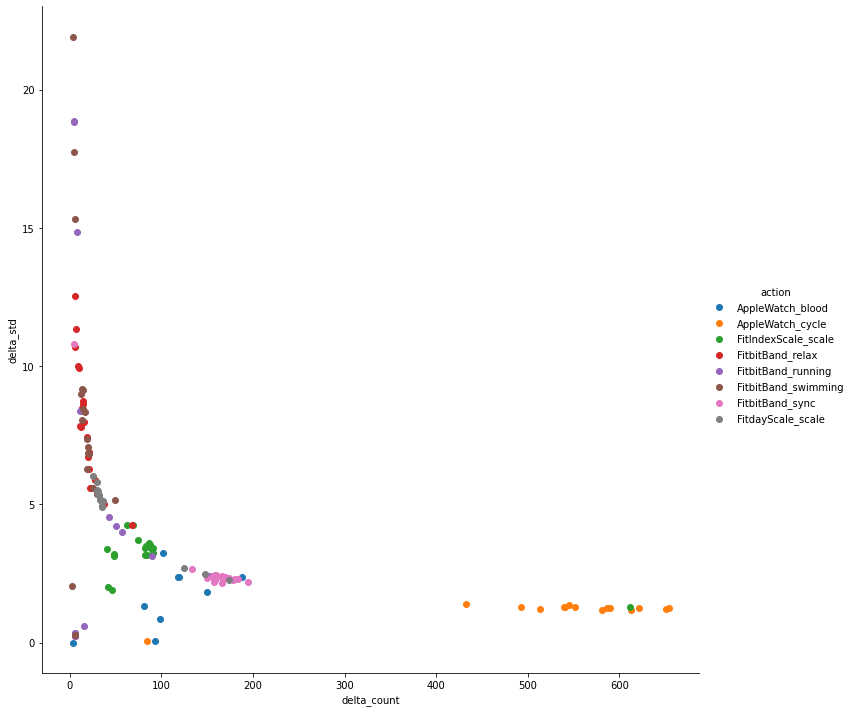

In [104]:
sns.FacetGrid(features.head(140), hue= 'action', height=10).map(plt.scatter, "delta_count", "delta_std").add_legend()
plt.show()

In [105]:
S_features = features[["delta_count", "delta_std", "notnull_mean", "action"]]
# device classification
labelencoder = LabelEncoder()
actions = np.array(features['action'])
y = labelencoder.fit_transform(actions)
y = pd.Series(y)
#y = np.array(y)
S_features["y"] = y
S_features.loc[S_features['y'] == 6]
#labelencoder.inverse_transform(y)

<ipython-input-105-fd54d414f33f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S_features["y"] = y


,delta_count,delta_std,notnull_mean,action,y
104,4,10.814632,32.000000,FitbitBand_sync,6
105,156,2.391383,80.307692,FitbitBand_sync,6
106,169,2.358739,86.378698,FitbitBand_sync,6
107,180,2.290099,82.416667,FitbitBand_sync,6
108,157,2.174026,81.515924,FitbitBand_sync,6
109,165,2.373882,77.987879,FitbitBand_sync,6
110,158,2.415011,82.632911,FitbitBand_sync,6
111,178,2.255612,74.393258,FitbitBand_sync,6
112,157,2.351655,81.006369,FitbitBand_sync,6
113,150,2.324406,83.926667,FitbitBand_sync,6


In [106]:
delta_count_s = []
delta_std_s = []
notnull_mean_s = []

for i in range(17):
    delta_count = S_features.loc[(S_features['y'] == i)]["delta_count"]
    delta_std = S_features.loc[(S_features['y'] == i)]["delta_std"]    
    notnull_mean = S_features.loc[(S_features['y'] == i)]["notnull_mean"]
    delta_count_s.append((delta_count.mean(), delta_count.min(), delta_count.max(), delta_count.std(), delta_std.mean(), delta_std.min(), delta_std.max(), delta_std.std(), notnull_mean.mean(), notnull_mean.min(), notnull_mean.max(), notnull_mean.std(), i))
Sig = pd.DataFrame(delta_count_s, 
                   columns=("delta_count_mean", "delta_count_min", "delta_count_max", "delta_count_std", 
                            "delta_std_mean", "delta_std_min", "delta_std_max", "delta_std_std", 
                            "notnull_mean_mean", "notnull_mean_min", "notnull_mean_max", "notnull_mean_std", 
                            "y"))
Sig

,delta_count_mean,delta_count_min,delta_count_max,delta_count_std,delta_std_mean,delta_std_min,delta_std_max,delta_std_std,notnull_mean_mean,notnull_mean_min,notnull_mean_max,notnull_mean_std,y
0,105.777778,3,188,50.566238,1.598912,0.000000,3.224189,1.116032,95.797885,47.000000,132.548387,23.456410,0
1,532.933333,84,654,137.726160,1.184158,0.065665,1.409181,0.316138,94.704001,88.745370,117.119048,7.093072,1
2,99.750000,41,612,121.931333,3.222919,1.272083,4.253268,0.722559,20.505567,15.905405,93.710784,17.235164,2
3,18.300000,6,68,13.955191,8.023392,4.258011,12.552033,2.146336,30.251869,16.014706,40.800000,5.359697,3
4,23.952381,5,153,37.359706,3.956157,0.236234,18.877386,6.101071,19.116622,10.666667,69.751634,14.762952,4
5,16.105263,2,49,11.034767,8.414020,0.266678,21.911975,5.086663,33.581812,10.666667,83.387755,13.013395,5
6,156.750000,4,194,38.295080,2.764562,2.154590,10.814632,1.897990,79.576248,32.000000,89.420765,11.734333,6
7,50.050000,25,174,43.336474,4.877548,2.255686,6.035363,1.070484,61.235632,60.000000,84.712644,5.525915,7
8,144.100000,32,150,26.385602,2.572227,2.424267,5.212070,0.621382,21.531333,19.506667,60.000000,9.054585,8
9,235.500000,150,240,20.124612,1.957669,1.927036,2.435253,0.112450,28.762833,19.506667,29.250000,2.178676,9


Fold 0
{'accuracy': 0.9538461538461539, 'precision': 0.9538461538461539, 'recall': 0.9538461538461539, 'f1score': 0.9538461538461539}
Fold 1
{'accuracy': 0.8615384615384616, 'precision': 0.8615384615384616, 'recall': 0.8615384615384616, 'f1score': 0.8615384615384615}
Fold 2
{'accuracy': 0.9076923076923077, 'precision': 0.9076923076923077, 'recall': 0.9076923076923077, 'f1score': 0.9076923076923076}
Fold 3
{'accuracy': 0.9538461538461539, 'precision': 0.9538461538461539, 'recall': 0.9538461538461539, 'f1score': 0.9538461538461539}
Fold 4
{'accuracy': 0.9076923076923077, 'precision': 0.9076923076923077, 'recall': 0.9076923076923077, 'f1score': 0.9076923076923076}
Fold 5
{'accuracy': 0.9076923076923077, 'precision': 0.9076923076923077, 'recall': 0.9076923076923077, 'f1score': 0.9076923076923076}
Fold 6
{'accuracy': 0.8923076923076924, 'precision': 0.8923076923076924, 'recall': 0.8923076923076924, 'f1score': 0.8923076923076924}
Fold 7
{'accuracy': 0.8615384615384616, 'precision': 0.8615384

<BarContainer object of 20 artists>

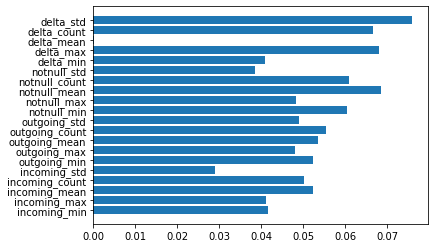

In [107]:
# action classification
labelencoder = LabelEncoder()
actions = np.array(features['action'])
y = labelencoder.fit_transform(actions)
y = pd.Series(y)

X_features = features.drop(['brand', 'device', 'action'], axis = 1)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2)
X_features = np.array(X_features)
y = np.array(y)

scores = []
y_test_all = []
y_pred_all = []

i = 0
for train_index, test_index in sss.split(X_features, y):
    print("Fold", i)

    X_train, X_test = X_features[train_index], X_features[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # use Random Forrest Classifier
    rf = RandomForestClassifier(n_jobs=8, n_estimators = 100, random_state = 0)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    score = dict(
        accuracy = metrics.accuracy_score(y_test, y_pred),
        precision = metrics.precision_score(y_test, y_pred, average='micro'),
        recall = metrics.recall_score(y_test, y_pred, average='micro'),
        f1score = metrics.f1_score(y_test, y_pred, average='micro'),
    )
    print(score)
    scores.append(score)
        
    y_test_all.extend(y_test)
    y_pred_all.extend(y_pred.tolist())
    i += 1

score = {k: np.mean([value[k] for value in scores]) for k in scores[0]}
print("action_score:", score)
print(labelencoder.inverse_transform(y_test))
print(labelencoder.inverse_transform(y_pred))
rf.feature_importances_
plt.barh(list((features.drop(['brand', 'device', 'action'], axis = 1)).columns.values), rf.feature_importances_)

In [108]:
list((features.drop(['brand', 'device', 'action'], axis = 1)).columns.values)

['incoming_min',
 'incoming_max',
 'incoming_mean',
 'incoming_count',
 'incoming_std',
 'outgoing_min',
 'outgoing_max',
 'outgoing_mean',
 'outgoing_count',
 'outgoing_std',
 'notnull_min',
 'notnull_max',
 'notnull_mean',
 'notnull_count',
 'notnull_std',
 'delta_min',
 'delta_max',
 'delta_mean',
 'delta_count',
 'delta_std']

In [109]:
import pandas as pd
import numpy as np
a = pd.read_csv("/Users/graceliu/Desktop/MyResearch/Health/every_byte_matters-master/inference_attack/My_random/Fitbit_noapp.csv")
b = pd.read_csv("/Users/graceliu/Desktop/MyResearch/Health/every_byte_matters-master/inference_attack/My_random/test/FitbitBand_sync_ble_19.csv")
random_time = a.iloc[300]["Time"]
ori = b["Time"].head(1)

b["Time"] = b["Time"] - np.ones(len(b)) * float(ori) + np.ones(len(b)) * float(random_time)
a_above = a[:300]
new_data = a_above.append(b, ignore_index=True)

a_below = a[301:]
a_below["Time"] = a_below["Time"] - np.ones(len(a_below)) * float(a_above.iloc[-1]["Time"])+ np.ones(len(a_below)) * float(new_data.iloc[-1]["Time"])
new_data_1 = new_data.append(a_below, ignore_index=True)
new_data_1
new_data_1.to_csv('/Users/graceliu/Desktop/MyResearch/Health/every_byte_matters-master/inference_attack/My_random/mix_out.csv')

<ipython-input-109-6b560e6b2fde>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_below["Time"] = a_below["Time"] - np.ones(len(a_below)) * float(a_above.iloc[-1]["Time"])+ np.ones(len(a_below)) * float(new_data.iloc[-1]["Time"])


In [110]:
a = pd.read_csv("/Users/graceliu/Desktop/MyResearch/Health/every_byte_matters-master/inference_attack/My_random/Fitbit_noapp.csv")

b = pd.read_csv("/Users/graceliu/Desktop/MyResearch/Health/every_byte_matters-master/inference_attack/My_random/test/FitbitBand_sync_ble_19.csv")
c = pd.read_csv("/Users/graceliu/Desktop/MyResearch/Health/every_byte_matters-master/inference_attack/My_random/mix/FitbitBand1_mix_ble_0.csv")
print(len(a))
print(len(b))
print(len(c))

1211
601
1811


In [111]:
mixfilename = "/Users/graceliu/Desktop/MyResearch/Health/every_byte_matters-master/inference_attack/My_random/mix/FitbitBand1_mix_ble_0.csv"
df = pd.read_csv(mixfilename, index_col=None, header=0)
df = df.reset_index()
df

,index,Unnamed: 0,No.,Time,Delta Time,Source,Destination,Protocol,Length,Info
0,0,0,401,44602.092,0.007,localhost (),remote (),ATT,14,"Sent Write Request, Handle: 0x001f (Unknown)"
1,1,1,404,44602.132,0.000,controller,host,HCI_EVT,8,Rcvd Number of Completed Packets
2,2,2,424,44602.243,0.020,remote (),localhost (),ATT,10,"Rcvd Write Response, Handle: 0x001f (Unknown)"
3,3,3,425,44602.248,0.005,localhost (),remote (),ATT,25,"Sent Write Command, Handle: 0x0012 (Unknown)"
4,4,4,443,44602.395,0.022,controller,host,HCI_EVT,8,Rcvd Number of Completed Packets
...,...,...,...,...,...,...,...,...,...,...
1806,1806,1806,60094,45101.146,0.002,controller,host,HCI_EVT,8,Rcvd Number of Completed Packets
1807,1807,1807,60096,45101.278,0.003,controller,host,HCI_EVT,8,Rcvd Number of Completed Packets
1808,1808,1808,60099,45101.281,0.003,controller,host,HCI_EVT,8,Rcvd Number of Completed Packets
1809,1809,1809,60100,45101.281,0.000,controller,host,HCI_EVT,8,Rcvd Number of Completed Packets


In [118]:
# create feature vector
# feature vector contains min/max/mean/count/std of packets and delta time
feature = {
    "incoming_min" : [],
    "incoming_max" : [],
    "incoming_mean": [],
    "incoming_count": [],
    "incoming_std": [],
    "outgoing_min" : [],
    "outgoing_max" : [],
    "outgoing_mean": [],
    "outgoing_count": [],
    "outgoing_std": [],
    "notnull_min" : [],
    "notnull_max" : [],
    "notnull_mean": [],
    "notnull_count": [],
    "notnull_std": [],
    "delta_min" : [],
    "delta_max" : [],
    "delta_mean": [],
    "delta_count": [],
    "delta_std": [], 
    "index": []
}

index_prev = 0
prev_time = 0
source_prev = 0
delta_time_all = []
for index, row in df.iterrows():
    # compute delta time
    delta_time_all.append(row['Time'] - prev_time)
    prev_time = row['Time']
    # loop every row
    if(row['index'] >= 600 or index == len(df) - 1):
        index_prev = index - 600
        delta_time = delta_time_all[index_prev : index - 1]
        # for every action
        # compute the statistical for ingoing packet length
        if(len([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y > 0]) == 0):
            feature.get("incoming_min").append(0)
            feature.get("incoming_max").append(0)
            feature.get("incoming_mean").append(0)
            feature.get("incoming_count").append(0)
            feature.get("incoming_std").append(0)  
        else:
            feature.get("incoming_min").append(np.min([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y > 0]))
            feature.get("incoming_max").append(np.max([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y > 0]))
            feature.get("incoming_mean").append(np.mean([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y > 0]))
            feature.get("incoming_count").append(len([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y > 0]))
            feature.get("incoming_std").append(np.std([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y > 0]))
        # compute the statistical for outgoing packet length
        if(len([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y < 0]) == 0):
            feature.get("outgoing_min").append(0)
            feature.get("outgoing_max").append(0)
            feature.get("outgoing_mean").append(0)
            feature.get("outgoing_count").append(0)
            feature.get("outgoing_std").append(0)      
        else:
            feature.get("outgoing_min").append(np.min([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y < 0]))
            feature.get("outgoing_max").append(np.max([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y < 0]))
            feature.get("outgoing_mean").append(np.mean([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y < 0]))
            feature.get("outgoing_count").append(len([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y < 0]))
            feature.get("outgoing_std").append(np.std([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y < 0]))
        # compute statistical for all packet length
        feature.get("notnull_min").append(np.min([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y != 0]))
        feature.get("notnull_max").append(np.max([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y != 0]))
        feature.get("notnull_mean").append(np.mean([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y != 0]))
        feature.get("notnull_count").append(len([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y != 0]))
        feature.get("notnull_std").append(np.std([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y != 0]))
        # compute statistical for delta time
        feature.get("delta_min").append(np.min(delta_time))
        feature.get("delta_max").append(np.max(delta_time))
        feature.get("delta_mean").append(np.mean(delta_time))
        feature.get("delta_count").append(len(delta_time))
        feature.get("delta_std").append(np.std(delta_time))
        # create labels
        feature.get("index").append(row['index'])
        source_prev = row['Source']


        #if( len(delta_time) >= Sig.iloc[[6]]["delta_count_min"].iloc[0]):
            #print("found at index:", index)

     


feature
features = pd.DataFrame(feature)
features

,incoming_min,incoming_max,incoming_mean,incoming_count,incoming_std,outgoing_min,outgoing_max,outgoing_mean,outgoing_count,outgoing_std,...,notnull_max,notnull_mean,notnull_count,notnull_std,delta_min,delta_max,delta_mean,delta_count,delta_std,index
0,8,194,68.343333,600,77.708808,0,0,0,0,0,...,194,68.343333,600,77.708808,0.0,44602.092,74.701172,599,1820.860604,600
1,8,194,68.643333,600,77.845763,0,0,0,0,0,...,194,68.643333,600,77.845763,0.0,11.063,0.240252,599,0.819807,601
2,8,194,68.953333,600,77.973892,0,0,0,0,0,...,194,68.953333,600,77.973892,0.0,11.063,0.240187,599,0.819824,602
3,8,194,69.260000,600,78.103152,0,0,0,0,0,...,194,69.260000,600,78.103152,0.0,11.063,0.240002,599,0.819866,603
4,8,194,69.290000,600,78.089602,0,0,0,0,0,...,194,69.290000,600,78.089602,0.0,11.063,0.239995,599,0.819868,604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,8,194,65.271667,600,76.447811,0,0,0,0,0,...,194,65.271667,600,76.447811,0.0,15.930,0.272683,599,1.336004,1806
1207,8,194,65.255000,600,76.459205,0,0,0,0,0,...,194,65.255000,600,76.459205,0.0,15.930,0.272260,599,1.336050,1807
1208,8,194,64.945000,600,76.313511,0,0,0,0,0,...,194,64.945000,600,76.313511,0.0,15.930,0.272259,599,1.336050,1808
1209,8,194,64.678333,600,76.232440,0,0,0,0,0,...,194,64.678333,600,76.232440,0.0,15.930,0.272476,599,1.336017,1809


In [73]:
Sig.iloc[[6]]["delta_count_max"].iloc[0]

15251

In [119]:
Sig.iloc[[6]]

,delta_count_mean,delta_count_min,delta_count_max,delta_count_std,delta_std_mean,delta_std_min,delta_std_max,delta_std_std,notnull_mean_mean,notnull_mean_min,notnull_mean_max,notnull_mean_std,y
6,156.75,4,194,38.29508,2.764562,2.15459,10.814632,1.89799,79.576248,32.0,89.420765,11.734333,6
